# Ensemble Methods with Random Forest
Ensemble methods are powerful techniques in machine learning that combine the predictions of multiple models to improve overall accuracy. This example demonstrates the use of the Random Forest algorithm, an ensemble method that aggregates predictions from multiple decision trees.

## Import Libraries and Load Data
We import the necessary libraries, including Pandas, Seaborn, Matplotlib, and Scikit-learn. We also load the "Wine Quality" dataset.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Wine Quality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')


# Explore the Dataset
We'll use Seaborn to visualize the distribution of wine quality.

In [5]:
# Display the first few rows of the dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


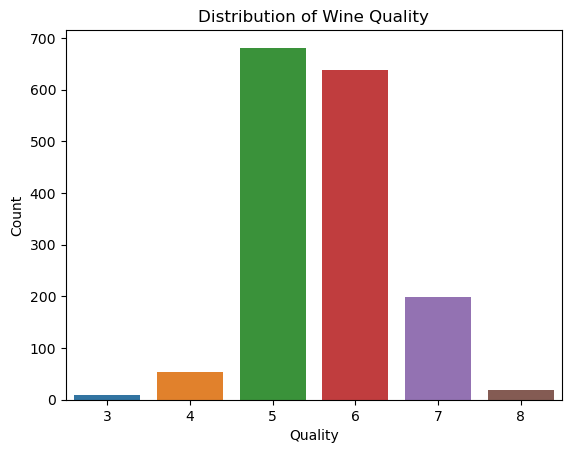

In [6]:
# Distribution of wine quality
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


# Prepare the Data for Training
We need to split the dataset into features (X) and target (y), and then into training and testing sets. We'll also normalize the data for better performance.

In [8]:
# Split the data into features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the Random Forest Model
We can now train a Random Forest classifier with a specified number of trees. The ensemble method combines the predictions from multiple decision trees to improve accuracy.

In [10]:
# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluate the Model
After training the model, we evaluate its performance using accuracy, confusion matrix, and classification report.

In [11]:
# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Classification report
classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)


Accuracy: 0.6645833333333333
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 149  44   2   0]
 [  0   0  45 140  15   0]
 [  0   0   0  31  29   1]
 [  0   0   0   1   4   1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.76      0.74       195
           6       0.63      0.70      0.66       200
           7       0.58      0.48      0.52        61
           8       0.50      0.17      0.25         6

    accuracy                           0.66       480
   macro avg       0.41      0.35      0.36       480
weighted avg       0.64      0.66      0.65       480



c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualize the Results
Let's plot the confusion matrix and compare the actual vs. predicted values to get a better understanding of the model's performance

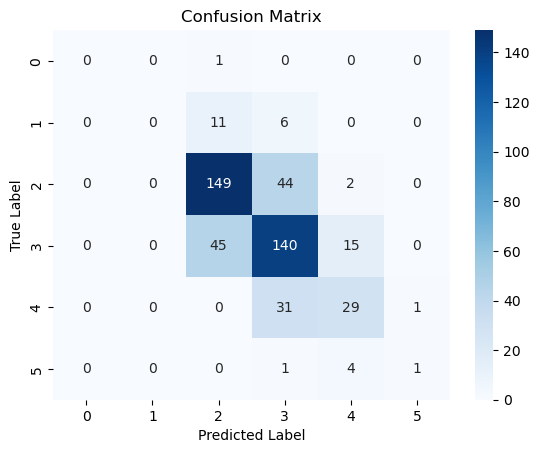

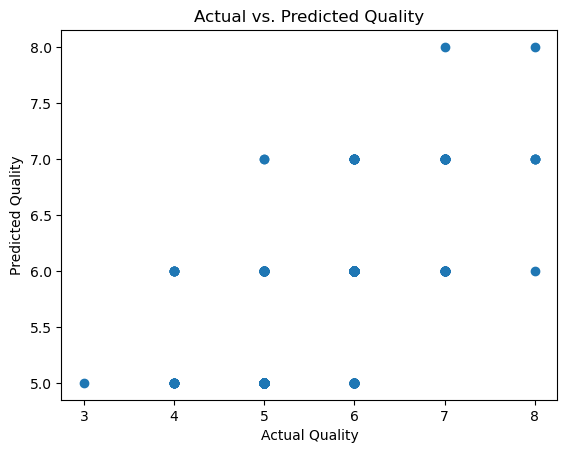

In [12]:
# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Scatter plot for actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Quality")
plt.show()


# Accuracy: 
The overall accuracy of the model is decent, indicating that it correctly classified about 66.46% of the instances in the test set.
Confusion Matrix:
# The confusion matrix 
shows the distribution of predicted classes against the actual classes.
For instance, the entry (2,3) indicates that the model predicted class 5 when the actual class was 4 for 11 instances.
Entries along the diagonal represent correct predictions, while off-diagonal entries represent misclassifications.
# Insights:
The model performs reasonably well in predicting classes 5 and 6, with relatively high precision and recall.
However, it struggles with classes 3, 4, and 8, as indicated by low precision, recall, and F1-scores.
Class imbalance may be a contributing factor to the lower performance in certain classes.
# Conclusions:
The Random Forest classifier shows promise in accurately classifying instances into multiple classes.
Further optimization and fine-tuning may be necessary to improve performance, especially for classes with lower precision and recall.
Feature engineering, hyperparameter tuning, and addressing class imbalances could enhance model performance.